# Chapter 5 - Words

Link for detail explanation. Click here:
* [5.1-Word](https://github.com/leonewtonz/NLP-Basic-Python/blob/master/Part_2-Words/Chapter_05_words/5.1_Words1.ipynb)
* [5.2-Word](https://github.com/leonewtonz/NLP-Basic-Python/blob/master/Part_2-Words/Chapter_05_words/5.2_Words2.ipynb)

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    | 

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package nps_chat

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\lichn\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package universal

True

Import all text from NLTK's book library

In [2]:
from nltk.book import *
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Preprocessing text4

In [3]:
token4 = [t.lower() for t in text4]
set4 = set(token4)
print('Number of tokens in text4:', len(token4))
print('Number of unique tokens in text4:', len(set4))
print('First 5 unique tokens in text4:', sorted(set4)[:5])

Number of tokens in text4: 152901
Number of unique tokens in text4: 9312
First 5 unique tokens in text4: ['!', '"', '";', '"?', '$']


More processing:
- Remove number and punctuation

In [4]:
token4 = [t for t in token4 if t.isalpha() and
           t not in stopwords.words('english')]
print('Number of tokens in text4 after processing:', len(token4))

Number of tokens in text4 after processing: 65522


### Lexical Diversity

In [5]:
print('Lexical diversity from raw text: %.2f' %(len(set4) / len(token4)))

Lexical diversity: 0.14


### Lemmas



In [6]:
wnl = WordNetLemmatizer()
lemmas = [wnl.lemmatize(t) for t in token4]
# make unique
uLemmas = set(lemmas)
print('Number of unique lemmas in text4:', len(uLemmas))

Number of unique lemmas in text4: 8017


### Dictionary of counts

In [7]:
count = {} # make empty dictionary
count = {t:lemmas.count(t) for t in uLemmas}
print('citizen', count['citizen'])

citizen 304


## NLTK Text Object

In [8]:
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import Text

Build my own Text object from raw text

In [9]:
with open('const.txt', 'r') as f:
    text = f.read()
    
# remove newline character
text = text.replace('\n', '')

tokens = word_tokenize(text)

# remove number and punctuation. Then lower case
tokens = [t.lower() for t in tokens if t.isalpha()]

# create the Text object
text_const = Text(tokens)

print('Some tokens from constitution:', text_const[:10])

Some tokens from constitution: ['we', 'the', 'people', 'of', 'the', 'united', 'states', 'in', 'order', 'to']


### Demo for some Text methods

In [10]:
text_const.count('people')

7

In [11]:
text_const.concordance('people') # print context of every occurence of 'people'

Displaying 7 of 7 matches:
we the people of the united states in order to fo
bers chosen every secondyear by the people of the several states and the elect
 orof the press or the right of the people peaceably to assemble and to petiti
ity of a free state theright of the people to keep and bear arms shall not be 
anner to be prescribed right of the people to be secure in their persons house
ators from eachstate elected by the people thereof for six years and each sena
ke temporary appointments until the people fill thevacancies by election as th


In [12]:
text_const.index('people') # index of 1st 'people'

2

In [13]:
text_const.similar('people') # find words that appear in the same context of 'people'

legislature place laws right militia blessings constitution congress
senate house members secondyear state age number service term law
representation executiveauthority


In [14]:
text_const.common_contexts(['people', 'right'],10) # see what words share context with people and right

the_of the_to


## Dispersion plots
Visualize word occurences

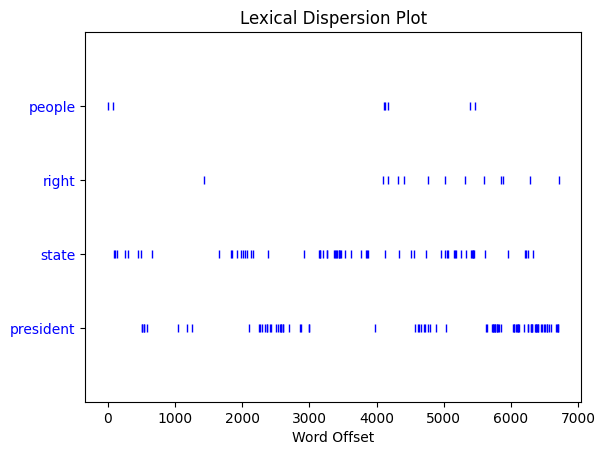

In [15]:
text_const.dispersion_plot(['people', 'right', 'state', 'president'])

## Frequency Distribution

In [16]:
fdist1 = FreqDist(text_const)
print(fdist1)

<FreqDist with 1384 samples and 6773 outcomes>


In [17]:
fdist1.most_common(10) # 10 most common word

[('the', 601),
 ('of', 446),
 ('shall', 268),
 ('and', 230),
 ('to', 181),
 ('be', 160),
 ('or', 144),
 ('in', 129),
 ('states', 107),
 ('by', 93)]

In [18]:
fdist1['people'] # same as count

7

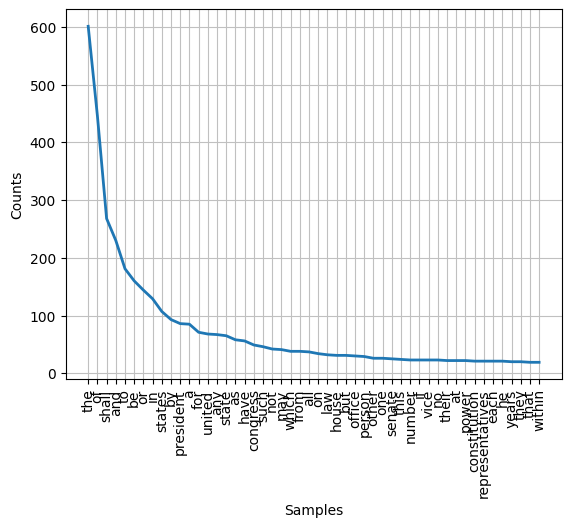

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
fdist1.plot(50, cumulative=False) # plot the frequecies of the 50 most common words

## Zipf's law

**Zipf's law:** The most common word occurs twice as often as the next most common word, three time as often as the next words, etc.

In the other hand, there are many word that only occur once in a document. It is called hapax legomenon.

In [20]:
hapaxes = fdist1.hapaxes()
hapaxes[:10]

['form',
 'perfect',
 'insure',
 'tranquility',
 'commondefence',
 'general',
 'welfare',
 'blessings',
 'toourselves',
 'posterity']

## Heap's Law

Add 1 to dictionary if word already exist. If not, add new word to dictionary

Method 1: Using loop

In [21]:
vocab1 = {}
for t in tokens:
    if t in vocab1:
        vocab1[t] += 1
    else:
        vocab1[t] = 1
print('Number of items in dict:', len(vocab1))
print(list(vocab1.items()) [:10]) # convert dict to list, then print first 10 items (key, value)

Number of items in dict: 1384
[('we', 2), ('the', 601), ('people', 7), ('of', 446), ('united', 68), ('states', 107), ('in', 129), ('order', 2), ('to', 181), ('form', 1)]


Method 2: Using dictionary comprehension

In [22]:
vocab2 = {t:tokens.count(t) for t in tokens}
print('Number of items in dict:', len(vocab2))

Number of items in dict: 1384


Heap's law: 

## More example

* Build a vocabulary
* Print all words longer than 12 character

In [25]:
v = set(text_const)
long_words = [w for w in v if len(w)>12]
long_words

['butlergeorgia',
 'theratification',
 'insurrections',
 'intoexecution',
 'theestablishment',
 'questionshall',
 'insuppressing',
 'generalwelfare',
 'otherconstitutional',
 'kingconnecticut',
 'beencommitted',
 'thereuponcongress',
 'andrepresentatives',
 'representatives',
 'orrepresentative',
 'uponconfirmation',
 'controversies',
 'tocontroversies',
 'participation',
 'executiveauthority',
 'counterfeiting',
 'consideration',
 'onapplication',
 'ofrepresentatives',
 'presidentwhenever',
 'representativesto',
 'thelegislatures',
 'republicanform',
 'appropriationsmade',
 'concerningcaptures',
 'representative',
 'thanaccording',
 'naturalization',
 'theprovisions',
 'otheremolument',
 'gilmanmassachusetts',
 'thejurisdiction',
 'ininsurrection',
 'maleinhabitants',
 'twentydollars',
 'disqualification',
 'baldwinattest',
 'sundaysexcepted',
 'suchvacancies',
 'maritimejurisdiction',
 'oraffirmation',
 'connecticutfive',
 'appointambassadors',
 'adjournmentprevent',
 'legislaturecan

In [28]:
v2 = set(text_const)
print(v)
v2[:4]
sort(v2)

{'escaping', 'reason', 'beproved', 'orof', 'forces', 'accused', 'sealed', 'privilege', 'pinckney', 'union', 'ofvotes', 'declaration', 'totheir', 'net', 'thesenators', 'by', 'butlergeorgia', 'theratification', 'december', 'ofamerica', 'claim', 'betaken', 'dobbs', 'forgoverning', 'particularly', 'ineligible', 'senateand', 'insurrections', 'color', 'thisarticle', 'meeting', 'emoluments', 'profit', 'imports', 'temporary', 'forpresident', 'party', 'insure', 'officers', 'immediately', 'assistance', 'census', 'perfect', 'presented', 'treason', 'had', 'equity', 'whenin', 'articles', 'manner', 'invasion', 'mode', 'corruption', 'tonnage', 'successors', 'establish', 'breach', 'pay', 'andno', 'remain', 'provided', 'aresident', 'constitution', 'expel', 'return', 'stateswhich', 'demand', 'virginia', 'opinion', 'one', 'beauthorized', 'timeof', 'impeachments', 'any', 'withrespect', 'andoffenses', 'wheneverthe', 'affecting', 'suchplace', 'authority', 'consuls', 'againstthem', 'decide', 'fortheir', 'pre

TypeError: 'set' object is not subscriptable

In [37]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
stop_words += ['aaaa', 'must', 'every', 'one']  # add more stop words
print(stop_words)
stop_words +=['zzz']
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '